# Jaeson Final Project; Optimal Kmeans Clustering for Market Segmentation on Airline Customers.

In [4]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score

In [5]:
# Flight Dataset
df = pd.read_csv('flight.csv')
df.sample(10)

MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER  WORK_CITY  \
43325      20423   9/30/2005         7/31/2006    Male         4   shanghai   
5265       14266   5/29/2011         5/29/2011    Male         5   liaoyuan   
22553       3978   1/24/2009         1/25/2009  Female         4    beijing   
39166      59166   1/21/2011         1/21/2011    Male         4   shanghai   
51754      16387    2/4/2013          2/4/2013    Male         4          .   
49377      23102   12/5/2010         2/20/2011    Male         4  guangzhou   
30952      17922  11/11/2008        11/11/2008  Female         4   shenyang   
29675      43951   1/24/2011          1/1/2013    Male         4  changchun   
27273      58519  11/10/2010        11/10/2010  Female         4         HK   
25983      59465  10/11/2012        12/14/2012    Male         4    qingdao   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
43325      shanghai           CN  39.0  3/31/2014  ...    4113.0        6207   
5265          jilin           CN  54.0  3/31/2014  ...   18218.0       35754   
22553       beijing           CN  47.0  3/31/2014  ...       0.0       11078   
39166      shanghai           CN  42.0  3/31/2014  ...    3002.0        7210   
51754      xinjiang           CN   NaN  3/31/2014  ...       0.0        3184   
49377     guangdong           CN  40.0  3/31/2014  ...       0.0        3658   
30952      liaoning           CN  34.0  3/31/2014  ...    1960.0        7289   
29675         jilin           CN  55.0  3/31/2014  ...    5368.0       10932   
27273            HK           HK  33.0  3/31/2014  ...    4930.0       12804   
25983      shandong           CN  39.0  3/31/2014  ...    8968.0       16540   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
43325        11/23/2013          130     40.500000          147   
5265          1/30/2014           62     16.075000           90   
22553         2/14/2013          412     32.857143           76   
39166         3/29/2014            3     99.333333          185   
51754          2/5/2013          421      1.000000            1   
49377         10/3/2012          546     65.000000           65   
30952         12/2/2013          121    148.250000          586   
29675         2/28/2014           33     47.000000           93   
27273         2/18/2014           43    106.000000          223   
25983         3/24/2014            8     66.571429          249   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
43325               0      0.633899        2975                0  
5265                0      0.925059       32265                0  
22553               0      0.973935       10805                1  
39166               0      0.671361        4854                0  
51754               0      0.780747        1569                0  
49377               0      0.780631        2891                0  
30952               0      0.982192        6466                0  
29675               0      0.695314        8354                2  
27273               0      0.665000        5985                0  
25983               0      0.549081        7763                0  

[10 rows x 23 columns]

## 1. EDA 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

1. The Dataset Has 62,988 lines dan 23 columns.
2. Data Type:

- 4 datetime columns: FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, LAST_FLIGHT_DATE.

- 10 numeric integer columns (e.g., FLIGHT_COUNT, SEG_KM_SUM, etc.).

- 5 numeric float columns (e.g., SUM_YR_1, SUM_YR_2, avg_discount).

- 4 categorical columns: GENDER, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY.

### 1. Missing Values

In [7]:
missing_values = df.isnull().sum()
missing_values

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

Missing Values:

- GENDER (3)
- WORK_CITY (2,936)
- WORK_PROVINCE (3,248)
- WORK_COUNTRY (26)
- AGE (420)
- SUM_YR_1 (551)
- SUM_YR_2 (138)
- LAST_FLIGHT_DATE (421)

### 2. Descriptive Statistics

#### 1. Numerical

In [8]:
numeric_stats = df.describe()
numeric_stats

MEMBER_NO      FFP_TIER           AGE  FLIGHT_COUNT         BP_SUM  \
count  62988.000000  62988.000000  62568.000000  62988.000000   62988.000000   
mean   31494.500000      4.102162     42.476346     11.839414   10925.081254   
std    18183.213715      0.373856      9.885915     14.049471   16339.486151   
min        1.000000      4.000000      6.000000      2.000000       0.000000   
25%    15747.750000      4.000000     35.000000      3.000000    2518.000000   
50%    31494.500000      4.000000     41.000000      7.000000    5700.000000   
75%    47241.250000      4.000000     48.000000     15.000000   12831.000000   
max    62988.000000      6.000000    110.000000    213.000000  505308.000000   

            SUM_YR_1       SUM_YR_2     SEG_KM_SUM   LAST_TO_END  \
count   62437.000000   62850.000000   62988.000000  62988.000000   
mean     5355.376064    5604.026014   17123.878691    176.120102   
std      8109.450147    8703.364247   20960.844623    183.822223   
min         0.000000       0.000000     368.000000      1.000000   
25%      1003.000000     780.000000    4747.000000     29.000000   
50%      2800.000000    2773.000000    9994.000000    108.000000   
75%      6574.000000    6845.750000   21271.250000    268.000000   
max    239560.000000  234188.000000  580717.000000    731.000000   

       AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  avg_discount   Points_Sum  \
count  62988.000000  62988.000000    62988.000000  62988.000000   62988.0000   
mean      67.749788    166.033895        0.319775      0.721558   12545.7771   
std       77.517866    123.397180        1.136004      0.185427   20507.8167   
min        0.000000      0.000000        0.000000      0.000000       0.0000   
25%       23.370370     79.000000        0.000000      0.611997    2775.0000   
50%       44.666667    143.000000        0.000000      0.711856    6328.5000   
75%       82.000000    228.000000        0.000000      0.809476   14302.5000   
max      728.000000    728.000000       46.000000      1.500000  985572.0000   

       Point_NotFlight  
count     62988.000000  
mean          2.728155  
std           7.364164  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max         140.000000

1. **Age**  
   - **Average**: 42.47 years  
   - **Min - Max**: 6 - 110 years (needs to be checked for possible outliers)

2. **Flight Count**  
   - **Average**: 11.84  
   - **Maximum**: 213 (indicates frequent flyer customers)

3. **Income**  
   - **Average**: around 5.3K – 5.6K  
   - **Maximum**: over 239K (could indicate outliers or premium customers)

4. **Total Passenger Distance Traveled**  
   - **Average**: 17K km  
   - **Maximum**: 580K km (indicates frequent travelers)

5. **Average Discount**  
   - **Average**: 72%  
   - **Min - Max**: 0% – 150% (should be checked, as discounts over 100% are illogical)

6. **Total Points Earned**  
   - **Average**: 12.5K  
   - **Maximum**: over 985K (some customers have very high points)

#### 2. Categorical

In [9]:
categorical_columns = ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']
categorical_counts = {col: df[col].nunique() for col in categorical_columns}

categorical_distribution = {col: df[col].value_counts(dropna=False) for col in categorical_columns}

categorical_counts, categorical_distribution

({'GENDER': 2, 'WORK_CITY': 3234, 'WORK_PROVINCE': 1165, 'WORK_COUNTRY': 118},
 {'GENDER': GENDER
  Male      48134
  Female    14851
  NaN           3
  Name: count, dtype: int64,
  'WORK_CITY': WORK_CITY
  guangzhou                  9386
  beijing                    7845
  shanghai                   5001
  shenzhen                   3605
  NaN                        2269
                             ... 
  zhumadianshi                  1
  wengao                        1
  shandongshengqingdaoshi       1
  GEELONG                       1
  Minami Awaji-shi              1
  Name: count, Length: 3235, dtype: int64,
  'WORK_PROVINCE': WORK_PROVINCE
  guangdong    17509
  beijing       8014
  shanghai      4998
  liaoning      4182
  NaN           3248
               ...  
  chiba            1
  KORDA            1
  SAUDIA           1
  JAWATIMUR        1
  GIFVKEN          1
  Name: count, Length: 1166, dtype: int64,
  'WORK_COUNTRY': WORK_COUNTRY
  CN    57748
  HK      991
  JP      8

1. **Gender**  
   - **Male**: 48,134 customers  
   - **Female**: 14,851 customers  
   - **Missing (NaN)**: 3 customers  

2. **Work_City**  
   - **Unique cities**: 3,233  
   - **Top 3 Cities of Origin**:  
     - Guangzhou: 9,386 customers  
     - Beijing: 7,845 customers  
     - Shanghai: 5,001 customers  
   - **Missing (NaN)**: 2,269 customers  

3. **Work_Province**  
   - **Unique provinces**: 1,165  
   - **Top 3 Provinces of Origin**:  
     - Guangdong: 17,509 customers  
     - Beijing: 8,014 customers  
     - Shanghai: 4,998 customers  
   - **Missing (NaN)**: 3,248 customers  

4. **Work_Country**  
   - **Unique countries**: 118  
   - **Majority from**:  
     - China: 57,748 customers  
     - Hong Kong: 991 customers  
     - Japan: 875 customers  
   - **Missing (NaN)**: 26 customers  

### 3. Data Distibution    

#### 1. Numerical


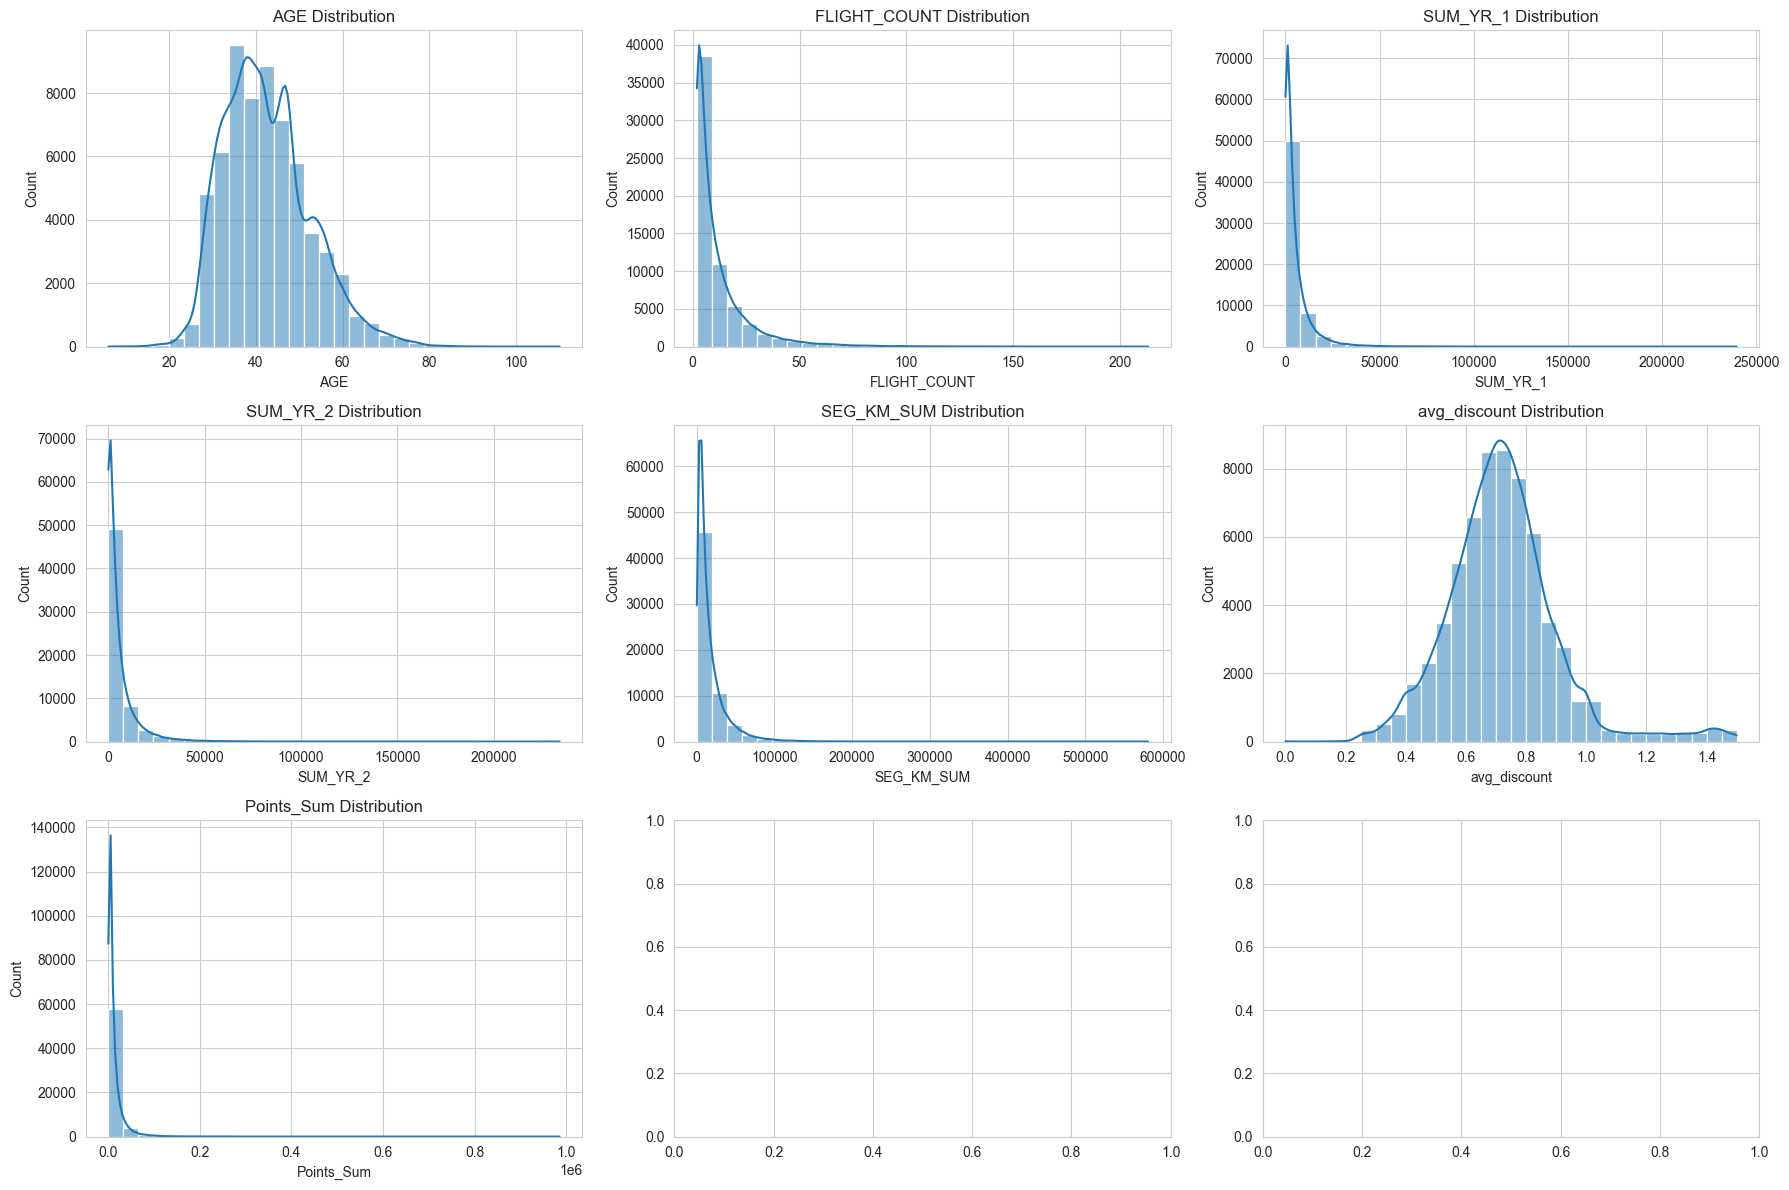

In [10]:
sns.set_style("whitegrid")

numeric_cols = ['AGE', 'FLIGHT_COUNT', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'avg_discount', 'Points_Sum']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

for i, col in enumerate(numeric_cols):
    ax = axes[i // 3, i % 3]
    sns.histplot(df[col].dropna(), bins=30, kde=True, ax=ax)
    ax.set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

1. **AGE**  
   - Follows a normal distribution  
   - Outliers observed at ages 6 and 110  

2. **FLIGHT_COUNT**  
   - Most customers have fewer than 20 flights  
   - Some customers are very frequent flyers (over 200 flights)  

3. **SUM_YR_1 & SUM_YR_2**  
   - Highly skewed distribution  
   - Some customers have exceptionally high income values  

4. **SEG_KM_SUM**  
   - Most customers have traveled ≤ 100K km  
   - Outliers exist with up to 580K km traveled  

5. **avg_discount**  
   - Many customers receive large discounts (average ~70%)  
   - Values over 100% are anomalies and need investigation  

6. **Points_Sum**  
   - Most customers have low point balances  
   - Some customers have nearly 1 million points  


#### 2. Categorical

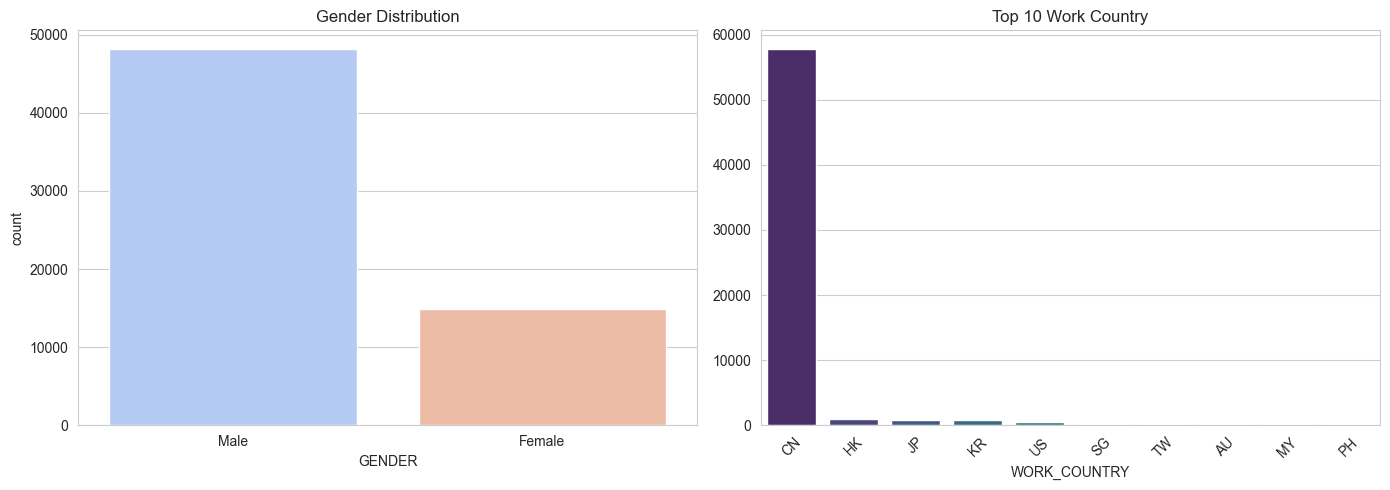

In [11]:
import warnings
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Gender
sns.countplot(x=df['GENDER'], palette='coolwarm', ax=axes[0])
axes[0].set_title('Gender Distribution')

# Work Country (Top 10)
top_countries = df['WORK_COUNTRY'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis', ax=axes[1])
axes[1].set_title('Top 10 Work Country')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

1. **Gender**  
   - The majority of customers are male (~76%), while females make up only around 24%

2. **Work Country**  
   - Most customers are from China, followed by Hong Kong, Japan, South Korea, and the United States


### 4. Corelation Analysis

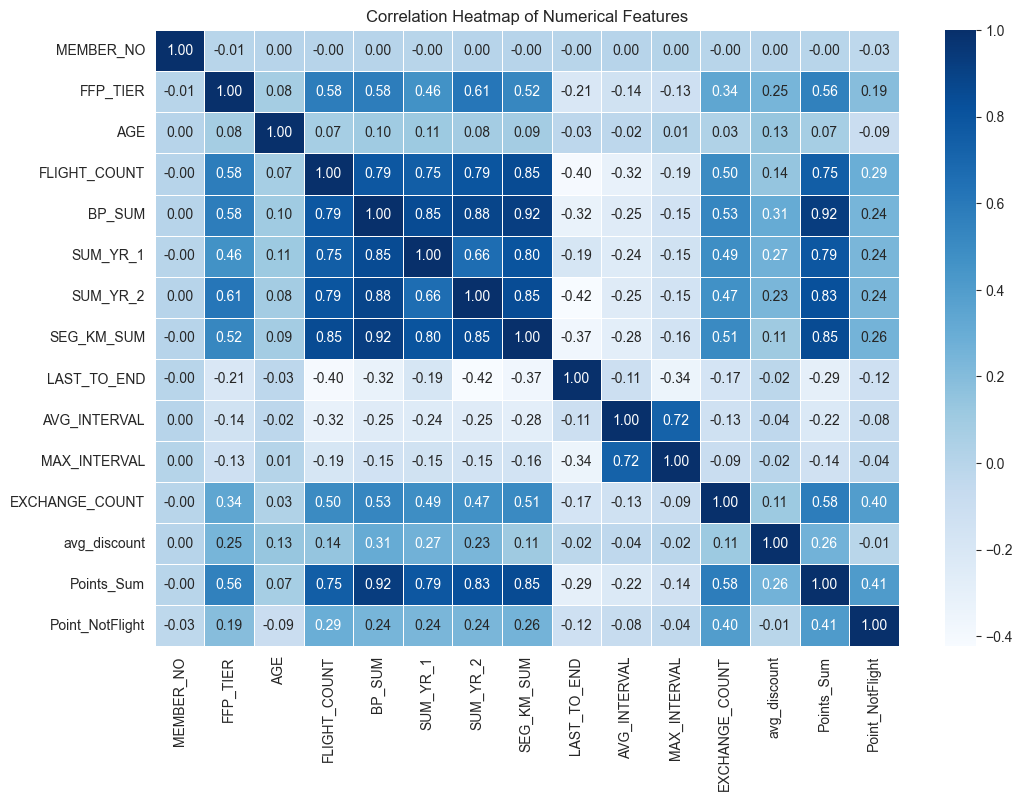

In [12]:
plt.figure(figsize=(12, 8))
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

- **Interesting relationships from the correlation heatmap**:

1. **SUM_YR_1 and SUM_YR_2**  
   - High correlation (~0.88), indicating that income from both years follows a similar pattern.

2. **SEG_KM_SUM and FLIGHT_COUNT**  
   - Strong correlation (~0.74), which makes sense as the more frequently someone flies, the greater the total distance traveled.

3. **Points_Sum**  
   - Correlates with both `FLIGHT_COUNT` and `SEG_KM_SUM`, showing that the more a person flies, the more points they accumulate.

4. **AGE**  
   - Shows no significant correlation with other variables, suggesting that a customer's age does not strongly influence their flying behavior.


### 5. EDA Conclution

1. **Missing Values**  
   - The dataset contains several missing values, especially in `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY`, and `SUM_YR_1`/`SUM_YR_2`.

2. **Outliers**  
   - Outliers are present in `AGE`, `SUM_YR_1`, `SUM_YR_2`, and `SEG_KM_SUM` and need to be addressed.

3. **Demographics**  
   - The majority of customers are from China, and there are more male customers than female.

4. **Frequent Flyers**  
   - Customers with high flight counts and long travel distances tend to have higher income and point balances.


## 2. Preprocessing and Feature Engineering 

In [13]:
df = df.copy()
df.shape # number of data points at the beginning

(62988, 23)

### 1. AGE

In [14]:
# Total missing data from 'AGE'
df['AGE'].isna().sum()

np.int64(420)

There is 420 data row that has missing values in the column 'AGE'. Because the amount is very small compared to the total data, we can discard AGE data with missing value

In [15]:
# Dropping rows with AGE = NaN
df = df.dropna(subset=['AGE'])

### 2. Tenure (Additional Feature From RFM)

For tenure, we calculate the number of days between each customer's FFP_DATE (membership start date) and LOAD_TIME (data extraction date), storing the result as a new column to represent customer loyalty duration.

In [16]:
# Feature tenure
tenure = pd.to_datetime(df['LOAD_TIME']) - pd.to_datetime(df['FFP_DATE'])
tenure = tenure.dt.days
df['tenure'] = tenure

### 3. Recency

For Recency, we can get from the 'LAST_TO_END' feature 

In [17]:
df['recency'] = df['LAST_TO_END']

### 4. Frequency

For Frequency, we can take from 'FLIGHT_COUNT' feature

In [18]:
df['frequency'] = df['FLIGHT_COUNT']

### 5. Monetary

For Monetary, I take from the total revenue from each customers from the feature 'SUM_YR_1' and 'SUM_YR_2'

In [19]:
p = df[df['SUM_YR_1'].isnull()] # Check data points that is SUM_YR_1 = NaN
p.sample(10)

MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER    WORK_CITY  \
61837       9893  11/17/2006         2/16/2007    Male         4      beijing   
46295      51460    6/3/2012         7/25/2012  Female         4            .   
55242      62265    3/1/2010         9/16/2011    Male         4    guangzhou   
53049      51448    6/5/2012          6/5/2012    Male         4  shanghaishi   
49770      51614   7/24/2012         7/24/2012    Male         4     shanghai   
45255      14256    6/8/2011          6/8/2011    Male         4      lanzhou   
54399      51076  11/22/2011        11/25/2011  Female         4  shanghaishi   
58844      33291   4/20/2012         5/26/2012  Female         4  shanghaishi   
56801      33332    4/5/2012          4/5/2012  Female         4     wulumuqi   
55562      28482  11/11/2010         1/21/2011    Male         4     shanghai   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  LAST_TO_END  \
61837       beijing           CN  51.0  3/31/2014  ...          613   
46295      shanghai           CN  28.0  3/31/2014  ...          534   
55242     guangdong           CN  43.0  3/31/2014  ...          496   
53049      shanghai           CN  34.0  3/31/2014  ...          662   
49770      shanghai           CN  41.0  3/31/2014  ...          613   
45255         gansu           CN  32.0  3/31/2014  ...          625   
54399      shanghai           CN  38.0  3/31/2014  ...          601   
58844      shanghai           CN  35.0  3/31/2014  ...          598   
56801      xinjiang           CN  45.0  3/31/2014  ...          724   
55562      shanghai           CN  58.0  3/31/2014  ...          427   

       AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  avg_discount Points_Sum  \
61837           2.0             2               0      1.000000       1000   
46295          41.0            71               0      0.743232       3050   
55242         126.0           126               0      0.475000        677   
53049           4.0             4               0      0.850000       1670   
49770           4.0             4               0      0.824919       2910   
45255           3.0             3               0      1.000000       3296   
54399           2.0             2               0      0.700000       1759   
58844          78.0            78               0      0.700000       1212   
56801           3.0             3               0      0.650000        886   
55562         129.0           254               0      0.466667       1452   

       Point_NotFlight  tenure  recency  frequency  
61837                0    2691      613          2  
46295                0     666      534          3  
55242                0    1491      496          2  
53049                0     664      662          2  
49770                0     615      613          2  
45255                0    1027      625          2  
54399                0     860      601          2  
58844                0     710      598          2  
56801                0     725      724          2  
55562                0    1236      427          3  

[10 rows x 26 columns]

After repeatedly sampling in the cell above, a unique pattern was observed: when the column `SUM_YR_1` is `NaN`, `SUM_YR_2` is always `0` and `recency` has a very high value (over 1 year). Therefore, data points with `SUM_YR_1 = NaN` are safe to drop.


In [20]:
# Dropping rows with SUM_YR_1 = NaN
df = df.dropna(subset=['SUM_YR_1'])

In [21]:
p = df[df['SUM_YR_2'].isnull()]
p.sample(10)

MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER    WORK_CITY  \
58702      25588   2/26/2013        12/13/2013  Female         4     shanghai   
51078       4303  10/15/2009          7/8/2013    Male         4     shanghai   
61701      38461   5/20/2007         2/18/2009    Male         4       dalian   
62842      10325   9/20/2009         9/20/2009    Male         4       yining   
62530      26995   6/20/2006         8/31/2013    Male         4  kelamayishi   
60138      54026   2/21/2008          7/2/2013    Male         4     wulumuqi   
50943      43518    3/4/2013         8/19/2013  Female         4       dalian   
58215      26548  10/30/2011        10/30/2011    Male         4     moyuxian   
55612      54775    6/1/2006         8/20/2006    Male         4      beijing   
50429      52686  12/19/2009        12/22/2009    Male         4    changchun   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  LAST_TO_END  \
58702      shanghai           CN  29.0  3/31/2014  ...          107   
51078      shanghai           CN  35.0  3/31/2014  ...          153   
61701      liaoning           CN  46.0  3/31/2014  ...          125   
62842      xinjiang           CN  67.0  3/31/2014  ...          113   
62530      xinjiang           CN  48.0  3/31/2014  ...          204   
60138      xinjiang           CN  54.0  3/31/2014  ...          242   
50943      liaoning           CN  37.0  3/31/2014  ...          167   
58215      xinjiang           CN  38.0  3/31/2014  ...          173   
55612       beijing           CN  52.0  3/31/2014  ...          247   
50429         jilin           CN  44.0  3/31/2014  ...          177   

       AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  avg_discount Points_Sum  \
58702           3.0             3               0      0.490000       1004   
51078          57.5           113               0      0.749193       2216   
61701           2.0             2               0      0.445367        346   
62842          38.0            38               0      0.440000        400   
62530          10.0            10               0      0.920000       1000   
60138          32.0            32               0      0.720000        905   
50943          29.5            55               0      0.837121       2078   
58215         157.0           157               0      0.575000        886   
55612           2.0             2               0      0.920000       1732   
50429           9.0             9               0      0.794594       2037   

       Point_NotFlight  tenure  recency  frequency  
58702                0     398      107          2  
51078                0    1628      153          3  
61701                0    2507      125          2  
62842                0    1653      113          2  
62530                0    2841      204          2  
60138                0    2230      242          2  
50943                0     392      167          3  
58215                0     883      173          2  
55612                0    2860      247          2  
50429                0    1563      177          2  

[10 rows x 26 columns]

After repeatedly sampling in the cell above, the same pattern was found: when the column `SUM_YR_2` is `NaN`, `SUM_YR_1` is always `0` and `tenure` has a very high value. Therefore, data points with `SUM_YR_2 = NaN` are safe to drop.


In [22]:
# Dropping rows with SUM_YR_2 = NaN
df = df.dropna(subset=['SUM_YR_2'])

In [23]:
df['monetary'] = df['SUM_YR_1'] + df['SUM_YR_2']

### 6. Handling for Work Location Data

Customers data is going to be categorized by country location (CN, ASIA, ETC)

In [24]:
# Check for missing data 'WORK_COUNTRY'
p = df[df['WORK_COUNTRY'].isna()]
p.sample(10)

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER WORK_CITY  \
16615         14  2/13/2009        10/20/2009    Male         4       NaN   
2226       45041  7/26/2007        11/14/2007    Male         4       NaN   
38208       8982  8/20/2006          6/9/2011    Male         4       NaN   
61567      29195  5/28/2005         7/20/2005    Male         4       NaN   
59161      45042  9/12/2008        10/20/2009  Female         4       NaN   
4563       18124  3/31/2006         7/24/2011    Male         4       NaN   
36287       2118  3/27/2005         4/18/2005    Male         4       NaN   
22787      27081  2/13/2009          8/8/2009    Male         4       NaN   
19774          1  3/31/2006         1/13/2007    Male         4       NaN   
13502      20244   4/6/2005         6/17/2005    Male         4       NaN   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  AVG_INTERVAL  \
16615           NaN          NaN  47.0  3/31/2014  ...     23.083333   
2226            NaN          NaN  49.0  3/31/2014  ...     15.377778   
38208           NaN          NaN  46.0  3/31/2014  ...     43.800000   
61567           NaN          NaN  50.0  3/31/2014  ...    109.000000   
59161           NaN          NaN  54.0  3/31/2014  ...    111.000000   
4563            NaN          NaN  66.0  3/31/2014  ...     26.900000   
36287           NaN          NaN  60.0  3/31/2014  ...     59.666667   
22787           NaN          NaN  53.0  3/31/2014  ...     42.750000   
19774           NaN          NaN  40.0  3/31/2014  ...      4.000000   
13502           NaN          NaN  47.0  3/31/2014  ...     63.363636   

       MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  Points_Sum Point_NotFlight  \
16615           146               0      1.328539       13725               0   
2226             95               1      0.817299       44113               1   
38208           167               0      0.848239        4787               0   
61567           109               0      0.900000        1000               0   
59161           111               0      0.800000        1152               0   
4563            188               0      1.218094       36630               0   
36287           288               0      0.542580        3669               0   
22787           144               0      0.441860        5101               1   
19774             7               0      0.658303        7035               0   
13502           349               1      0.924350       30934              37   

       tenure  recency  frequency  monetary  
16615    1872      448         13   13671.0  
2226     2440       19         46   33401.0  
38208    2780      505          6    4640.0  
61567    3229      393          2    1422.0  
59161    2026      533          2    1488.0  
4563     2922        4         21   33356.0  
36287    3291       75          7    4638.0  
22787    1872       41         17    3348.0  
19774    2922      198          3    7200.0  
13502    3281       27         12   13355.0  

[10 rows x 27 columns]

Almost all data points with `WORK_COUNTRY = NaN` also have missing values in `WORK_CITY` and `WORK_PROVINCE`. Therefore, rows with `NaN` values in `WORK_COUNTRY`, `WORK_CITY`, and `WORK_PROVINCE` can be dropped.


In [25]:
# Dropping rows where location is NAN
df = df.dropna(subset=['WORK_COUNTRY', 'WORK_CITY', 'WORK_PROVINCE'], how = 'all')

In [26]:
df['WORK_COUNTRY'].unique()

array(['CN', 'US', 'FR', 'JP', 'HK', 'MY', 'AU', 'NL', 'MX', 'CA', 'KR',
       'PK', 'TH', 'SG', 'BR', 'PE', 'AE', 'HN', 'PH', 'ID', 'MO', 'GN',
       'FL', 'KH', 'TW', 'VN', 'DE', 'IL', 'CH', 'PA', 'VT', 'EC', 'NG',
       'BI', 'GT', 'BE', 'GL', 'NZ', 'FA', 'NI', 'KO', 'AN', 'CC', 'UV',
       'MN', 'UK', 'AS', 'IT', 'OM', 'SE', 'BZ', 'IN', 'KZ', 'PT', 'NO',
       'MS', 'FI', 'UZ', 'NE', 'AT', 'AA', 'HU', 'CY', 'EG', 'MA', '中',
       'ES', 'MZ', 'IR', 'SW', 'RE', 'PS', 'KE', 'SN', 'BB', 'AZ', 'UA',
       'LB', 'YE', 'GE', 'SI', 'KA', 'MV', 'RO', 'ZA', 'DK', 'AB', 'CD',
       'UY', 'CM', 'TK', 'AR', 'BN', 'PN', 'BD', '北', 'SU', 'RU', '沈',
       'GU', 'GB', 'ZW', 'PP', nan, '芬', 'FO', 'IE', 'PR', 'BS', 'GH',
       'SK', 'cn', 'TR', 'LA', 'BG', 'CL', 'CR', 'SA'], dtype=object)

I used ChatGPT-4 to review the country code array above and found several problematic country codes: `['cn', 'FL', 'FA', 'KO', 'UV', 'MN', 'AS', 'RE', 'BB', 'AB', 'TK', 'PN', 'SU', 'GU', 'PP', 'FO', 'IA', '沈', '北', '芬', '中', 'nan']`. Therefore, these need to be handled one by one.


In [27]:
cc_problem = ['cn', 'FL', 'FA', 'KO', 'UV', 'AS', 'RE', 'AB', 'TK', 'PN', 'FO', 'IA', '沈', '北', '芬', '中', 'nan']

for i in cc_problem:
  cek = df[df['WORK_COUNTRY'] == i]
  print(cek)

       MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER WORK_CITY  \
56108      25338  12/27/2012        12/27/2012   Male         4    taibei   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  AVG_INTERVAL  \
56108        taiwan           cn  51.0  3/31/2014  ...           1.0   

       MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  Points_Sum Point_NotFlight  \
56108             1               0          0.45        1302               0   

       tenure  recency  frequency  monetary  
56108     459      460          2    1648.0  

[1 rows x 27 columns]
      MEMBER_NO  FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER WORK_CITY  \
1853      14442  7/5/2011          7/7/2011   Male         4     PARIS   

     WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  AVG_INTERVAL  \
1853         PARIS           FL  37.0  3/31/2014  ...     52.363636   

      MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  Points_Sum Point_NotFlight  \
1853           315               0      0.717172  

In [28]:
# Handling for 'cn'
df.loc[df['WORK_COUNTRY'] == 'cn', 'WORK_COUNTRY'] = 'TW'

# Handling for 'FL'
df.loc[df['WORK_COUNTRY'] == 'FL', 'WORK_COUNTRY'] = 'FR'

# Handling for 'FA'
df.loc[df['WORK_COUNTRY'] == 'FA', 'WORK_COUNTRY'] = 'FR'

# Handling for 'KO'
df.loc[df['WORK_COUNTRY'] == 'KO', 'WORK_COUNTRY'] = 'CN'

# Handling for 'UV'
df.loc[df['WORK_COUNTRY'] == 'UV', 'WORK_COUNTRY'] = 'NG'

# Handling for 'AS'
df.loc[df['WORK_COUNTRY'] == 'AS', 'WORK_COUNTRY'] = 'AU'

# Handling for 'RE'
df.loc[df['WORK_COUNTRY'] == 'RE', 'WORK_COUNTRY'] = 'FR'

# Handling for 'AB'
df.loc[df['WORK_COUNTRY'] == 'AB', 'WORK_COUNTRY'] = 'AZ'

# Handling for 'TK'
df.loc[df['WORK_COUNTRY'] == 'TK', 'WORK_COUNTRY'] = 'TR'

# Handling for 'PN'
df.loc[df['WORK_COUNTRY'] == 'PN', 'WORK_COUNTRY'] = 'KH'

# Handling for 'FO'
df.loc[df['WORK_COUNTRY'] == 'FO', 'WORK_COUNTRY'] = 'CN'

# Handling for '沈'
df.loc[df['WORK_COUNTRY'] == '沈', 'WORK_COUNTRY'] = 'CN'

# Handling for '北'
df.loc[df['WORK_COUNTRY'] == '北', 'WORK_COUNTRY'] = 'CN'

# Handling for '芬'
df.loc[df['WORK_COUNTRY'] == '芬', 'WORK_COUNTRY'] = 'FI'

# Handling for '中'
df.loc[df['WORK_COUNTRY'] == '中', 'WORK_COUNTRY'] = 'CN'

In [29]:
# Feature 'country_loc"
near_china = ['JP', 'HK', 'KR', 'MO', 'TW', 'MN', 'KZ', 'VN', 'LA', 'IN', 'RU', 'BD', 'NP']

# Assign Community Type
def assign_country(country):
    if country == 'CN':
        return 0
    elif country in near_china:
        return 1
    else:
        return 2

df['country_loc'] = df['WORK_COUNTRY'].apply(assign_country)

### 7. Choosing the Features

In [30]:
df.shape # Checking total data after cleaning

(61860, 28)

In [31]:
# Choosing features
feats = ['AVG_INTERVAL', 'tenure', 'recency', 'monetary','frequency', 'SEG_KM_SUM']
X = df[feats]

### 8. Outlier Treatment

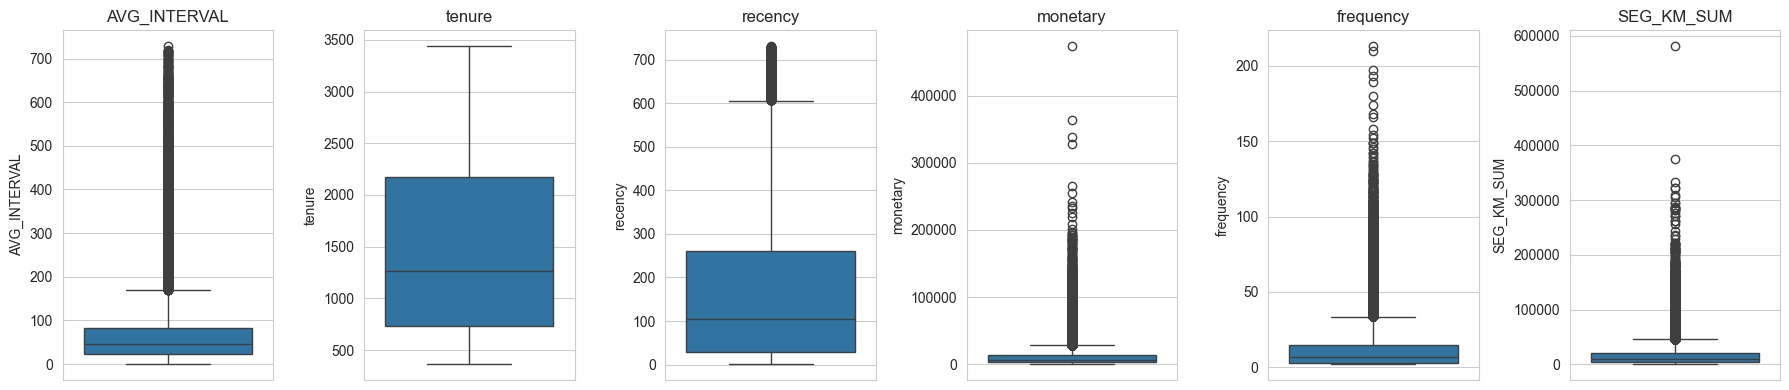

In [32]:
# Check distribution of chosen feature
def box_dist(feature, data):
    plt.figure(figsize=(len(feature) * 3, 4))
    for i, col in enumerate(feature, start=1):
        plt.subplot(1, len(feature), i)
        sns.boxplot(y=data[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

# Plot boxplot pretreatment
box_dist(feats, X)

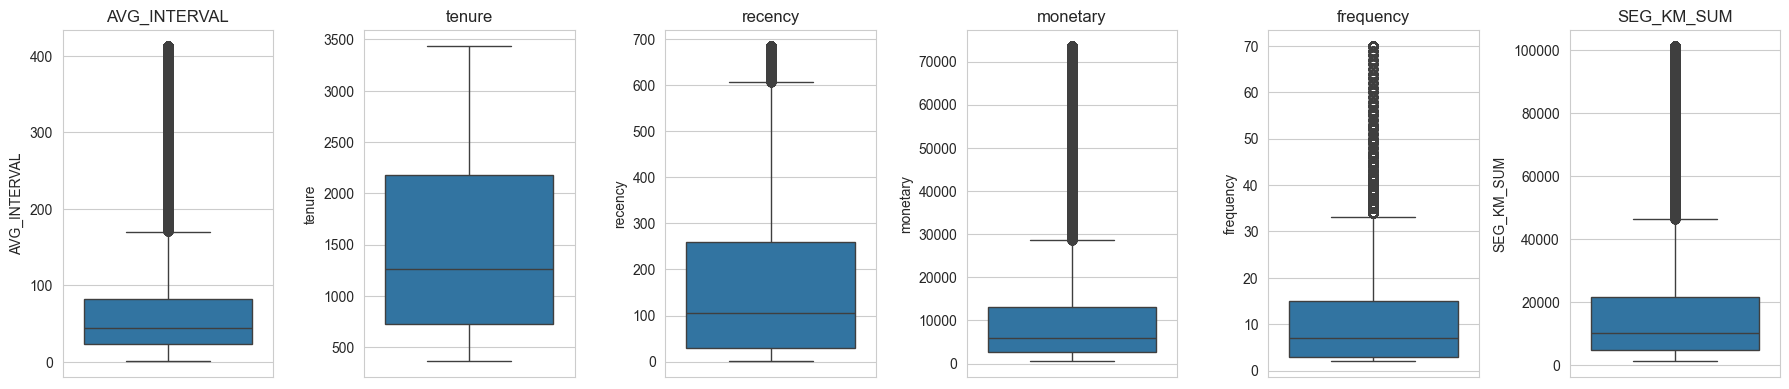

In [33]:
from scipy.stats.mstats import winsorize
perlu_outlier_treatment = ['AVG_INTERVAL', 'recency', 'frequency', 'monetary','SEG_KM_SUM']

for feat in perlu_outlier_treatment:
    X[feat] = winsorize(X[feat], limits=[0.01, 0.01])

# Plot boxplot after treatment
box_dist(feats, X)

### 9. Standardization

Since in this dataset the outliers represent important customer groups (e.g., long travel distance, high interval, high frequency, and high revenue), and we want these outliers to form their own clusters, **MinMaxScaler** is used instead of **StandardScaler**.


In [34]:
scaler = MinMaxScaler()
X_std = scaler.fit_transform(X)
X_std_df = pd.DataFrame(X_std, columns=feats)

## 3. Modeling and Evaluation

### 1. Checking Optimal Clusters using **Elbow Method**

In [35]:
wcss = []
K_range = range(2, 11)  # Testing cluster values from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_std_df)
    wcss.append(kmeans.inertia_)

print(wcss)

[12368.946538945514, 9353.326310412538, 6898.894274468755, 5915.63936749809, 5226.91832892676, 4671.023380971202, 4209.831691562808, 3887.323825902935, 3625.9528695691133]


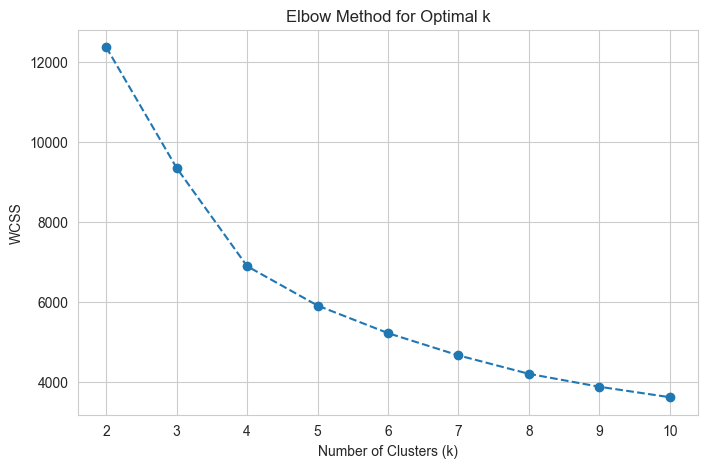

In [36]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

From the graph we see the hard bend at NO.4, hence the optimal number of cluster using the elbow method is 4

### 2. Checking Optimal Clusters Using **Silhouette Score**

In [ ]:
ss = []
K_range = range(2, 11)  # Testing cluster values from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_std_df)
    ss.append(silhouette_score(X_std_df, kmeans.labels_))

print(ss)

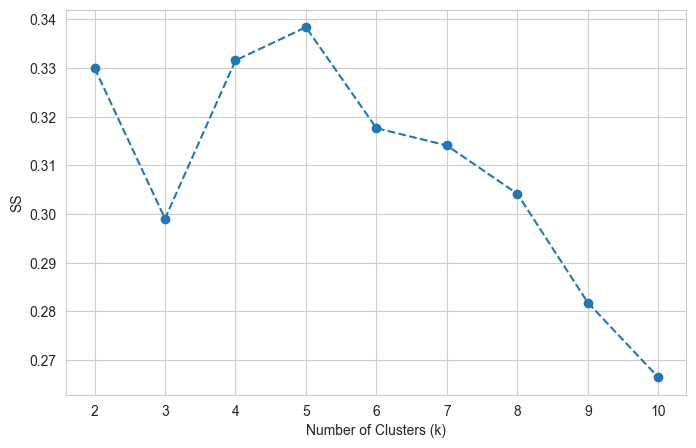

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, ss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SS')
plt.show()

From the graph above it shows that using silhouette score method the best cluster is 5.

Since the two method shows different results for best cluster, I will do a check for K=4 and K=5 in the next section

### 3. Checking for Optimal Number of Clusters(K)

#### Checking for K = 4

In [ ]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit_predict(X_std_df)
X_std_df['K_Cluster'] = kmeans.labels_

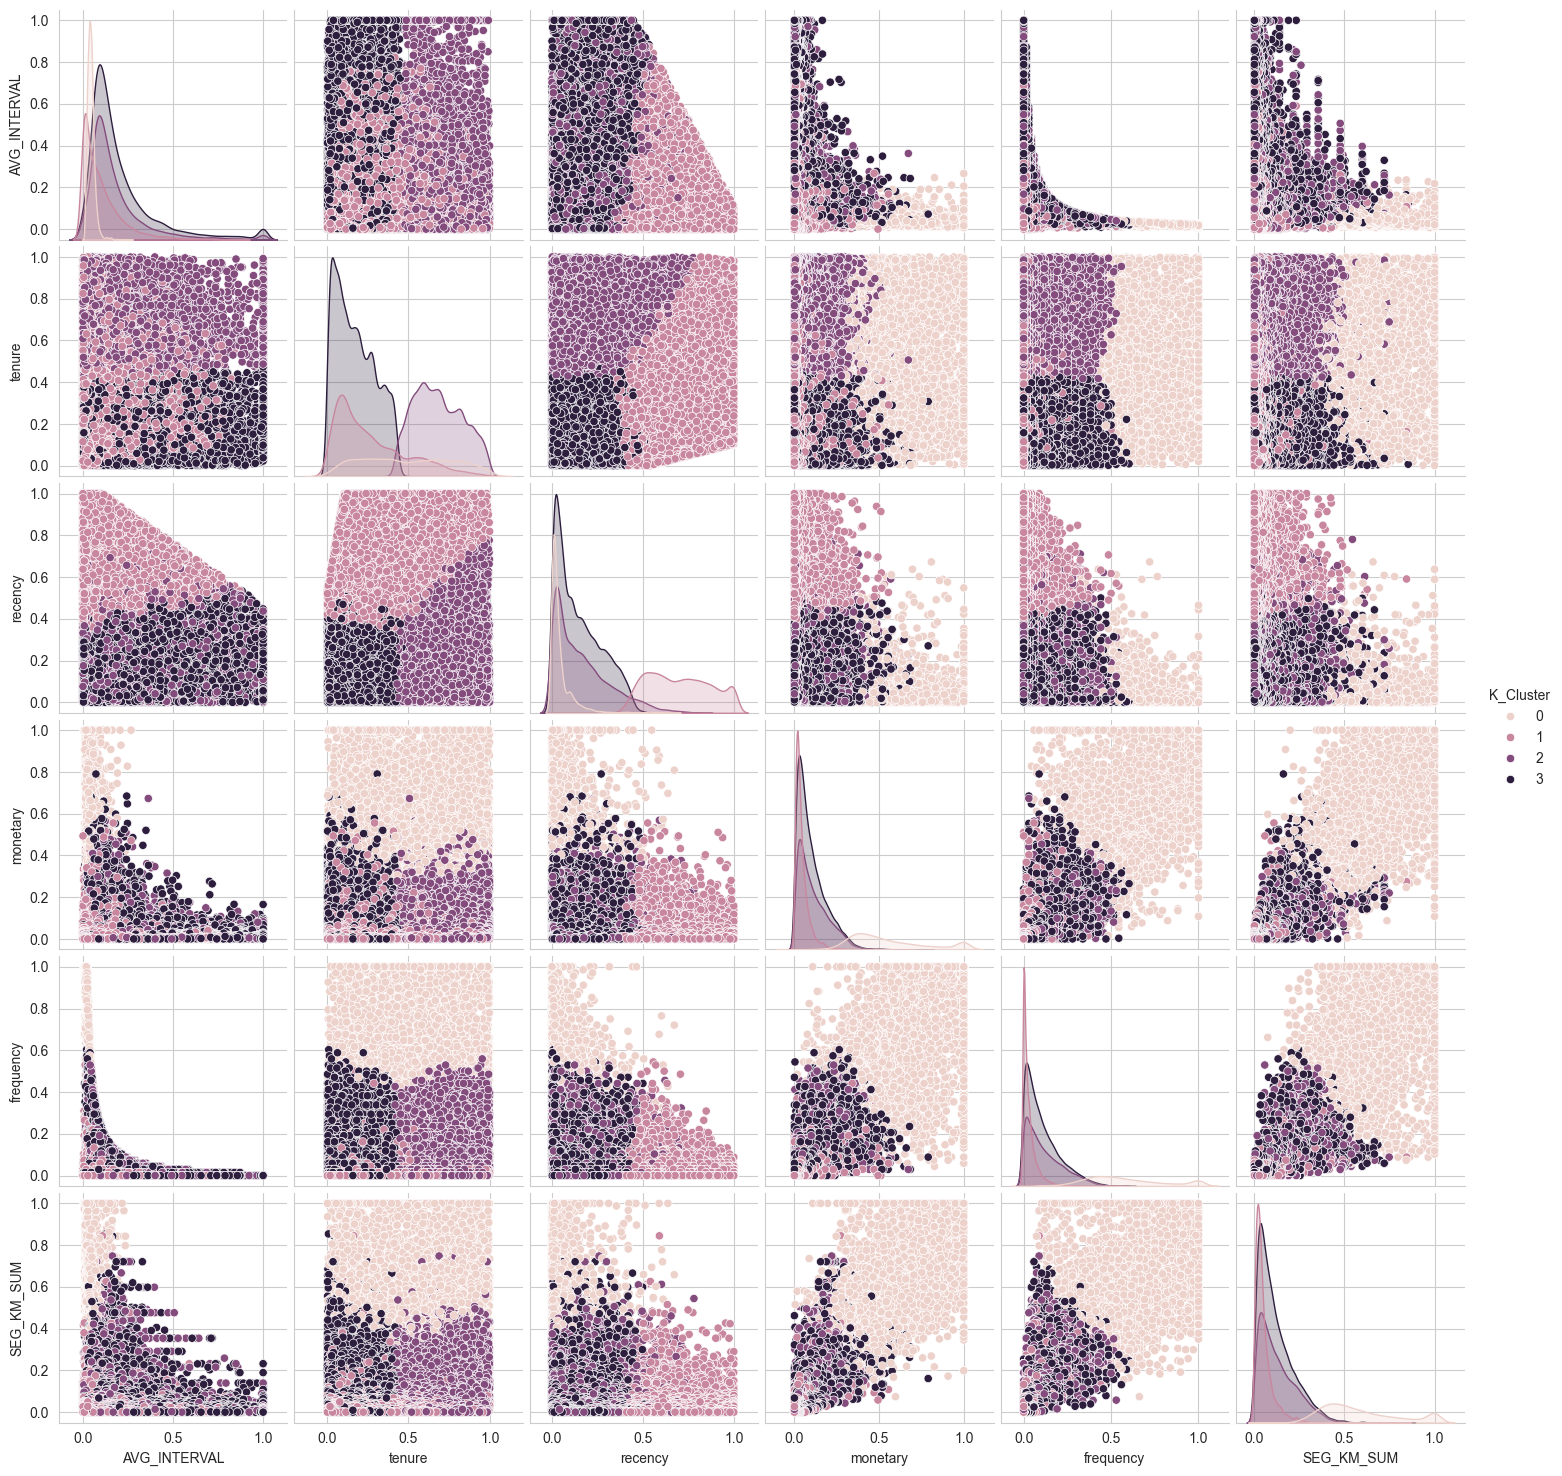

In [ ]:
sns.pairplot(data=X_std_df, hue='K_Cluster')

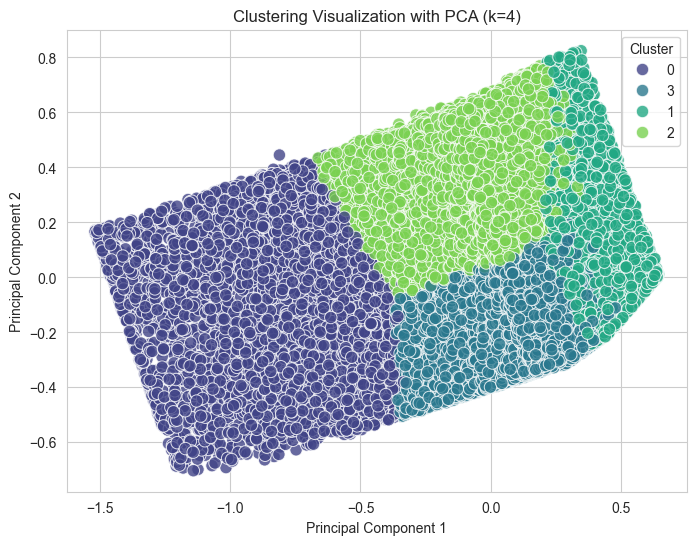

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std_df.drop(columns=['K_Cluster']))

# Convert PCA result into a DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = X_std_df['K_Cluster'].astype(str)

# Plot the PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=80, alpha=0.8)
plt.title(f'Clustering Visualization with PCA (k={k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

#### Checking for K = 5

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit_predict(X_std_df)
X_std_df['K_Cluster'] = kmeans.labels_

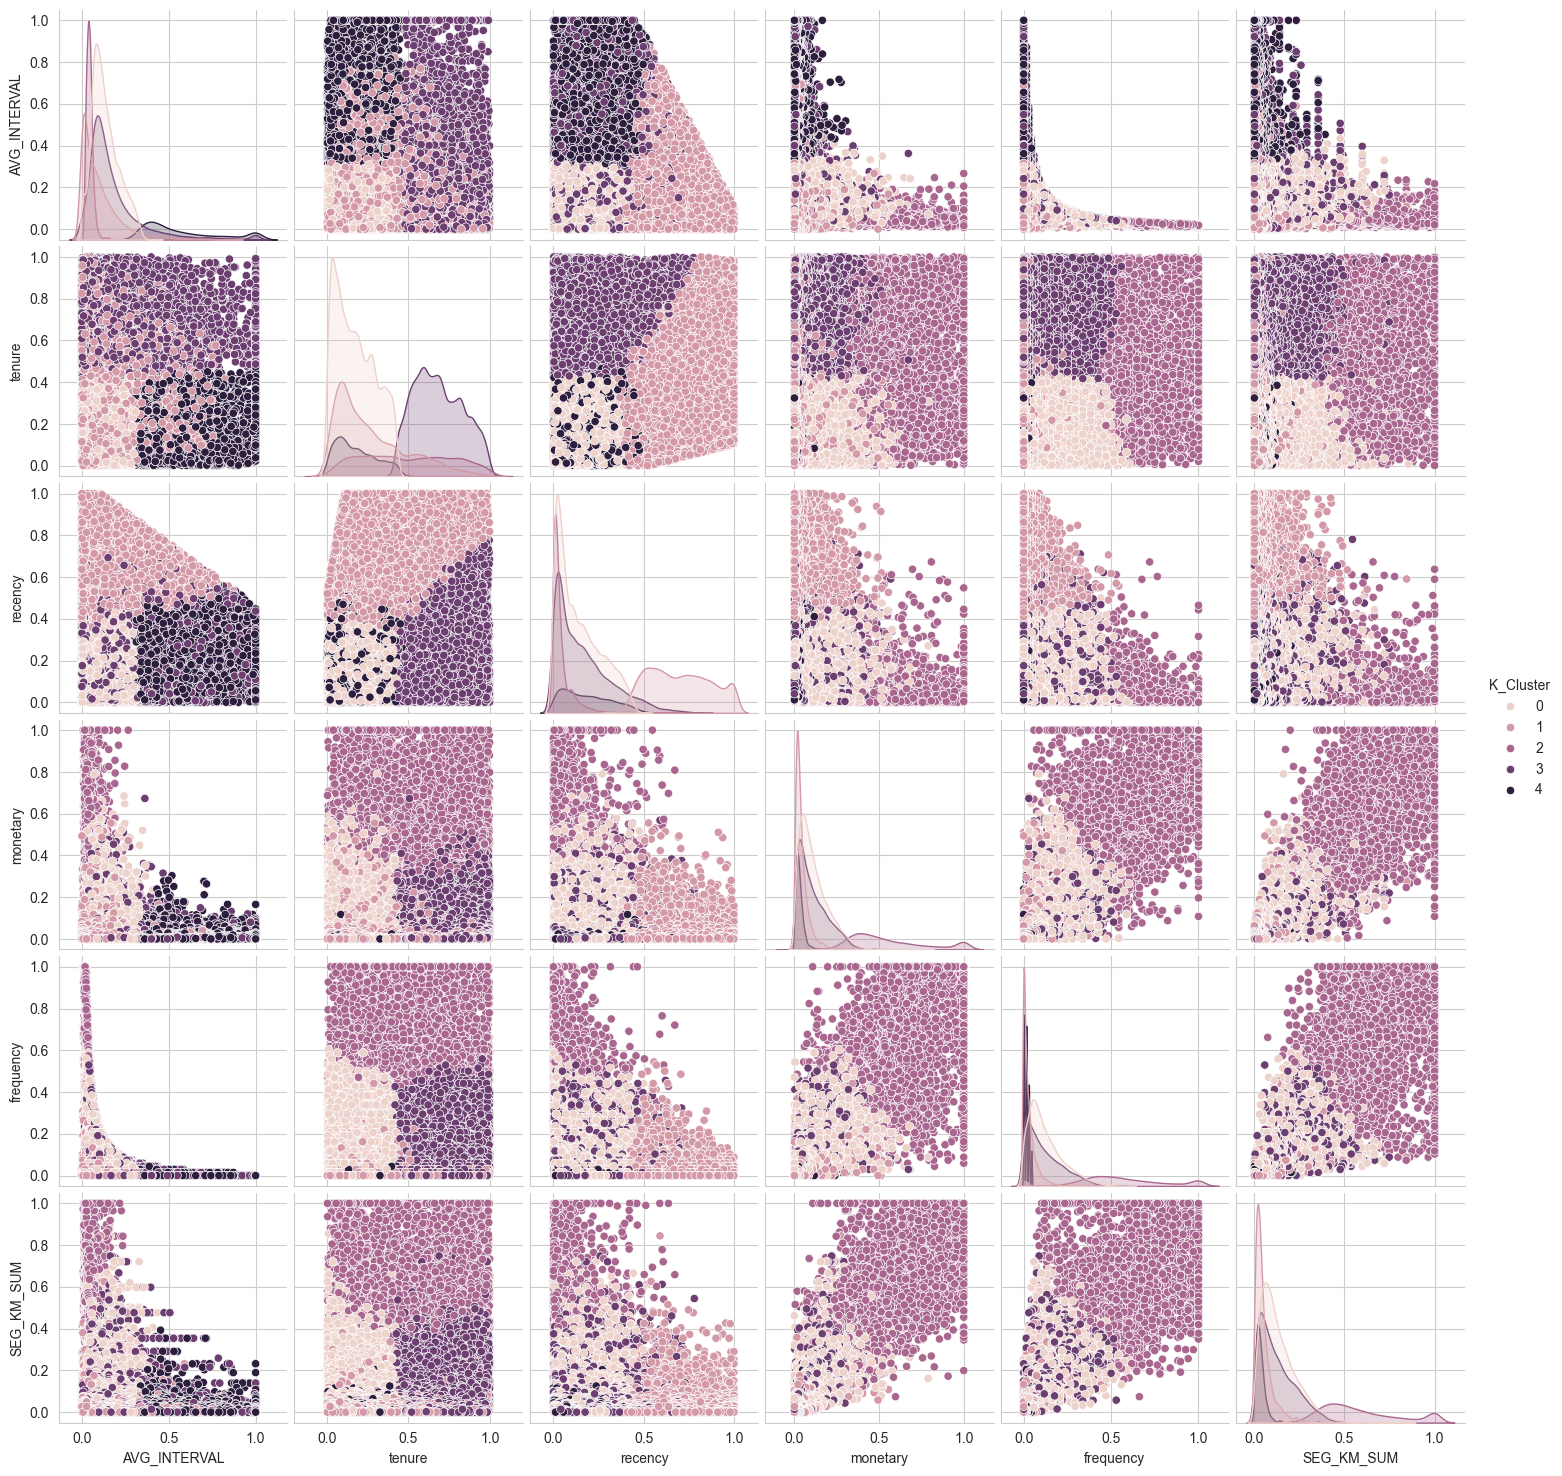

In [ ]:
sns.pairplot(data=X_std_df, hue='K_Cluster')

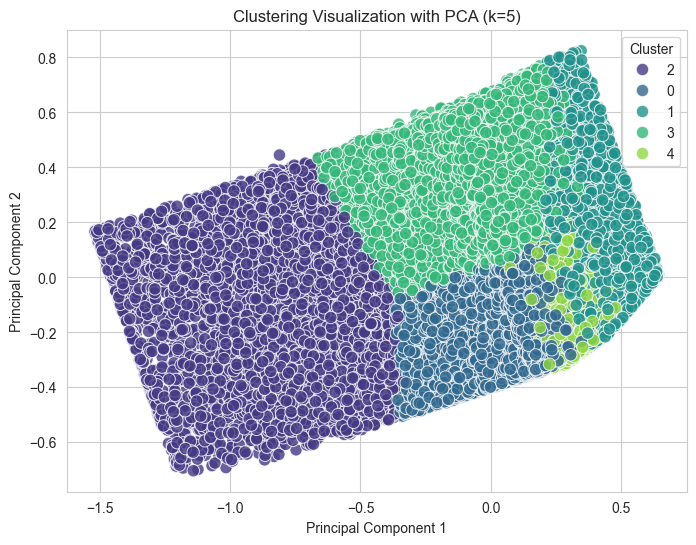

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std_df.drop(columns=['K_Cluster']))

# Convert PCA result into a DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = X_std_df['K_Cluster'].astype(str)

# Plot the PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=80, alpha=0.8)
plt.title(f'Clustering Visualization with PCA (k={k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

## 4. Conclution and Intrepetation of results

In [ ]:
df['K_Cluster'] = kmeans.labels_

NameError: name 'kmeans' is not defined

In [ ]:
# Summarized Statistics for each clusters 
df.groupby('K_Cluster')[['tenure', 'recency', 'frequency', 'monetary']].agg(['mean', 'median', 'std', 'count'])

NameError: name 'df' is not defined

In [ ]:
# Clearer view for each characteristics for each Clusters
df.groupby('K_Cluster')[['tenure', 'recency', 'frequency', 'monetary']].mean()

**Conclution for each clusters:**

1. Cluster 0 (Loyal Customers)
- In this cluster, customers have the highest tenure with an average of 2490 days , which indicates loyalty. The recency is fairly low on average of 112 days, indicating they have flown somewhat recently, they also maintain moderate frequency of flights on average of 10.6. Finally, they contribute high monetary value of average 9163. This indicates that they are loyal and stable segment of customers.

2. Cluster 1 (Engaged Medium-Term Customers)
- This Cluster includes customers that are modetrantly tenured but still highly engaged.  With an average tenure of about 901 days, they haven’t been with the airline as long as Cluster 0, but their recent activity is comparable, with a recency average of 96 days. They also fly moderately frequently on average of 10.6 times and have a high average monetary contribution of 9,001. This group shows potential for loyalty.

3. Cluster 2 (High Value Frequest Flyers)
- In this cluster, it shows the most valuable customers the airline has. As they have high tenure avreage of 1907, low recency average of 30 days, high average frequency of 44.8. And given the highest monetary value of 45845. This makes the the top priority customers aka VIPS.

4. Cluster 3 (Low-Value Inactive Customers)
- In this cluster, it shows low value customers, with short tenure of 1235, high recency of 143 days and very low frequncy of 3. Additonally their monetary value is at the lowest at 2569. This indicates this segment of customers are slowly slipping away and might need re-engagement to put incentive on them.

5. Cluster 4 (Moderate, Low-Engagement Customers)
- This cluster has disengaged customers moderate tenure at 1194, but very high average recency of 482. Addtionally thier frequency flight is low at 4 and low monetary average of 3704. This segment of customers shows that they havent flown for a very long time and need a lot of efforts to re-engage them. 


**Business Reccomendation**

	In order to maximize the customer segmentation, each segments need their own type of promotion to maximize engagement and profits. Here are some reccomended actions the company should take for each segement of customer.
    
1.	Nuture Cluster 0-1 (Stable Customers)
-	Profile: Long-tenured, engaged customers with solid spending.
-	Reccomended actions: Maintain their engagement with seasonal offers.
2.	Focus on Cluster 2 (High spending Customers)
-	Profile: Most active and profitable customers
-	Reccomended actions: Offer exclusive VIP rewards and elite benefits. 
3.	Reactivate Cluster 4 (Dormant Customers)
-	Profile: Inactive customers
-	Reccomended actions: Win-Back campaigns such as “miss you” promos
4.	Let go of Cluster 3 (Low Value Customers)
-	Profile: Low spenders
-	Reccomended actions: Low-cost emails to try to re-engage or let go. 
